In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('/media/khim3/Study Material/Academic/Data Mining/project/data/wind_dataset.csv')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [4]:
# check missing values
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [5]:
# list all columns with na values
df.columns[df.isnull().any()].tolist()

['IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G']

In [6]:
# fill missing values with mean
for col in df.columns[df.isnull().any()].tolist():
    df[col].fillna(df[col].mean(), inplace=True)
    df[col] = df[col].round(2)

/tmp/ipykernel_159483/1262324343.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [7]:
df.isnull().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

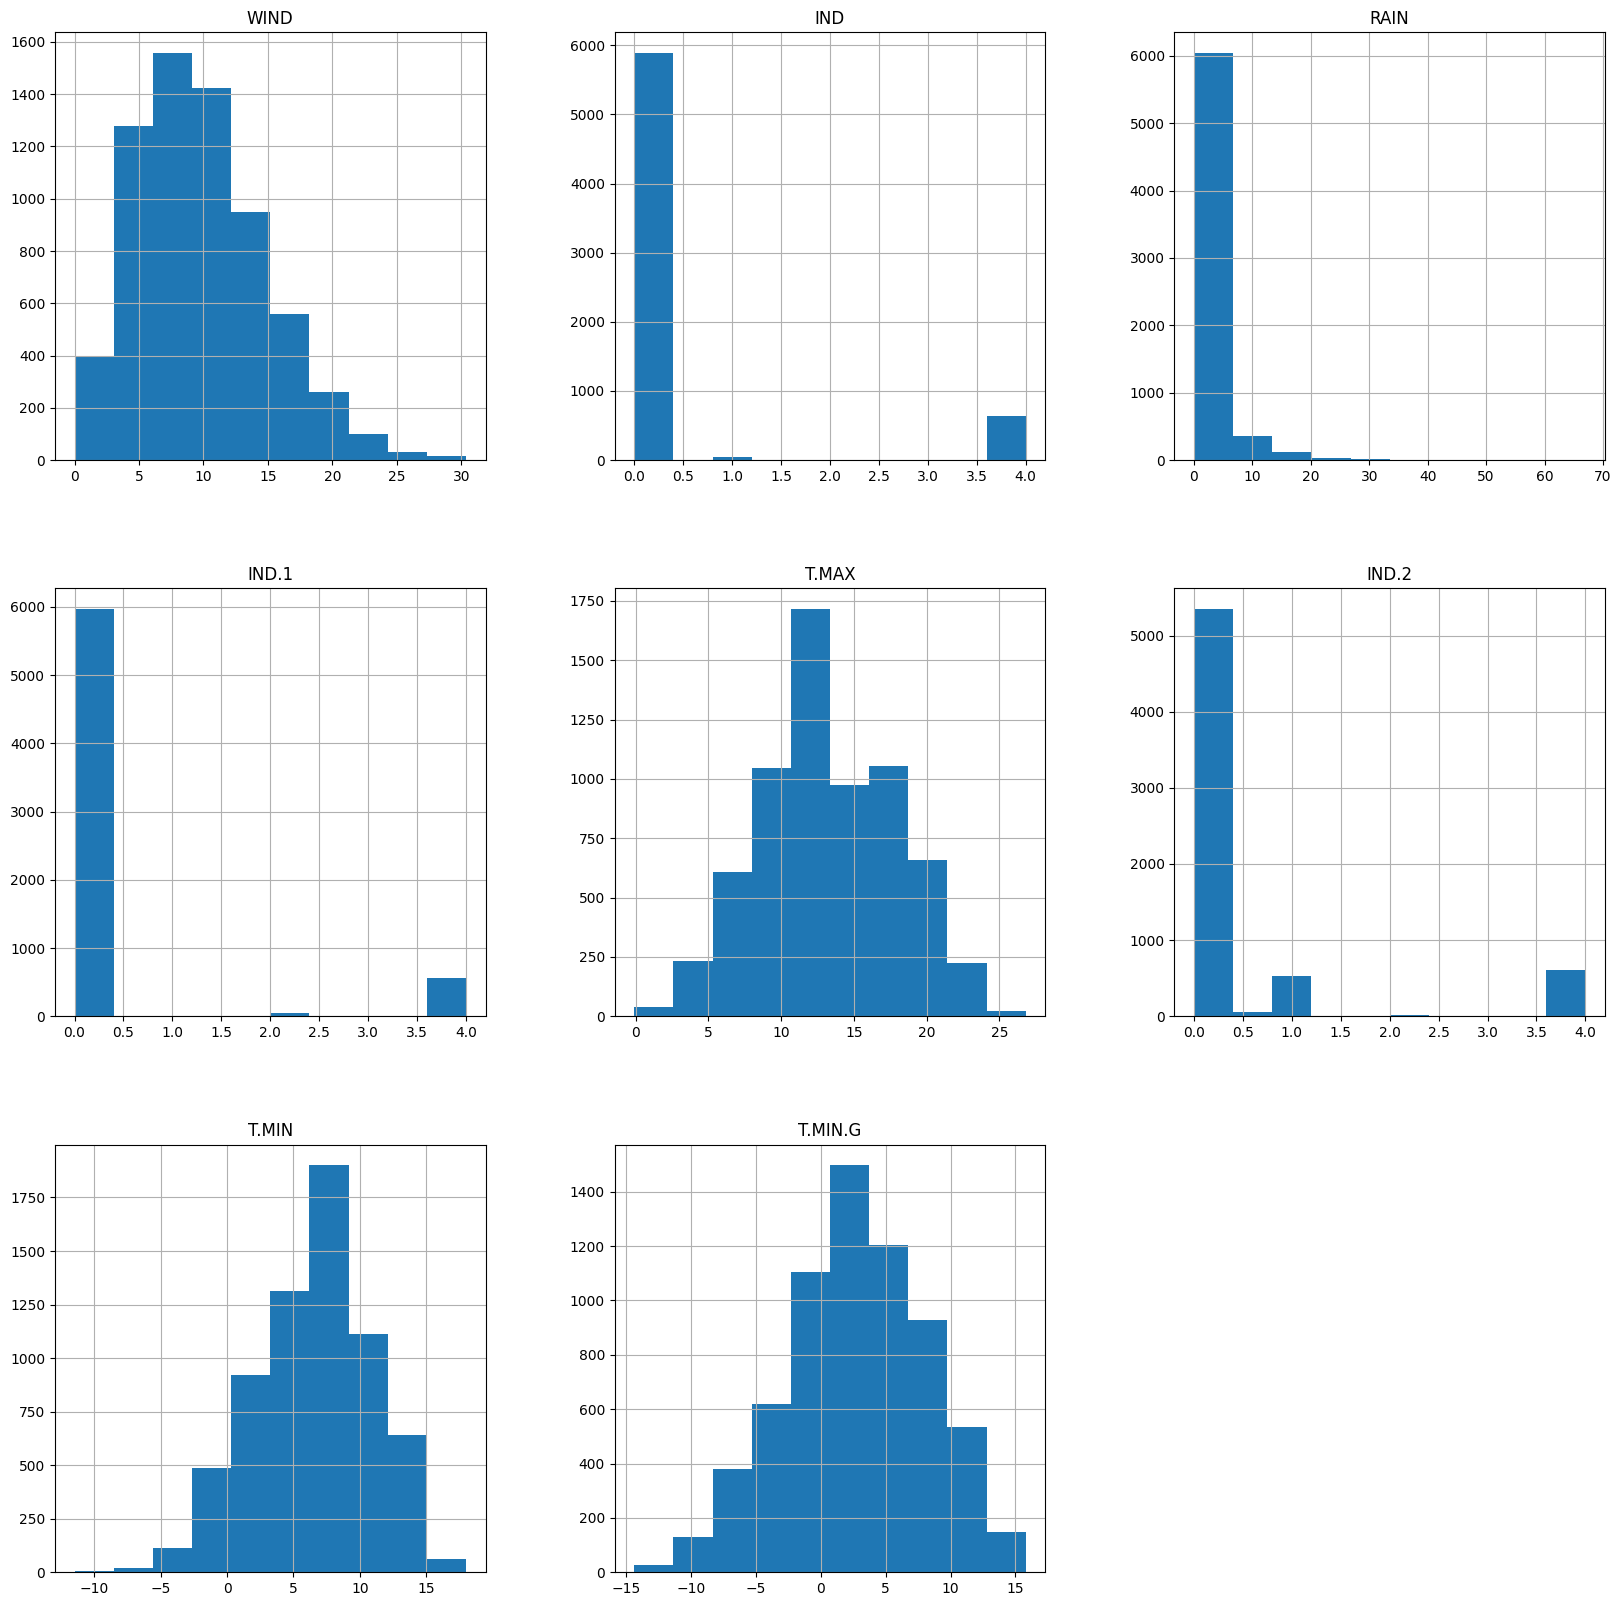

In [8]:
df.hist(figsize = (20,20));

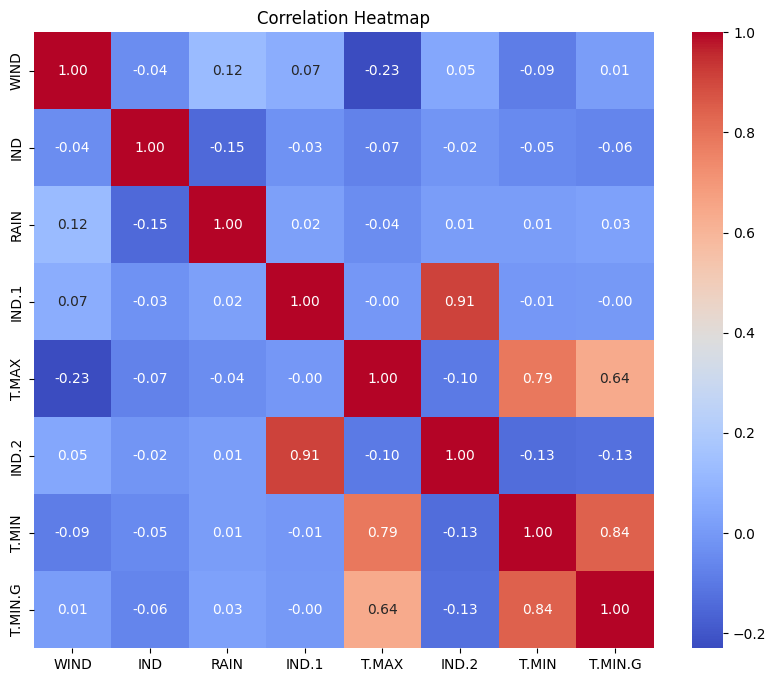

In [9]:
#check correlation


# Calculate the correlation matrix
corr = df.drop(columns=['DATE']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ID2, ID3 are highly correlated, while ID1 is not. However, ID1 is the only one that is not correlated with the target. Plus, ID1, ID2, and ID3 do not provide any information about the target. Therefore, we can drop them.

In [ ]:
X = df.drop(['IND', 'IND.1', 'IND.2'], axis=1)

# Separate the target ('WIND') and the 'DATE' column from the features
target = X['WIND']
date = X['DATE']
features = X.drop(['WIND', 'DATE'], axis=1)

# Apply StandardScaler to the features
std = StandardScaler()
features_scaled = std.fit_transform(features)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Add the 'DATE' and 'WIND' columns back to the DataFrame
final_df = pd.concat([date.reset_index(drop=True), features_scaled_df, target.reset_index(drop=True)], axis=1)

# Save the final DataFrame to a CSV file
final_df.to_csv("wind_dataset_main.csv", index=False)

print("Transformed DataFrame with target and date saved to 'wind_dataset_main_with_date.csv'")


Transformed DataFrame with target and date saved to 'wind_dataset_main_with_date.csv'
